In [1]:
import pandas as pd # read data from a CSV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
import math
import numpy as np

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance # shuffling_idx  X_permuted

In [2]:
data=pd.read_csv(r"../data_prep/prism_df_summer_13266000.csv")  #12413370,13266000



print(data)
print(data.columns)



     Unnamed: 0        Date  ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
0           146  2017-06-01      0.02              15.4               23.0   
1           147  2017-06-02      3.96              10.1               16.3   
2           148  2017-06-03      0.00              10.7               19.2   
3           149  2017-06-04      0.00              13.3               21.6   
4           150  2017-06-05      3.47               8.8               19.3   
..          ...         ...       ...               ...                ...   
176         595  2018-08-27      0.00              13.6               18.3   
177         596  2018-08-28      0.00               7.6               15.2   
178         597  2018-08-29      0.00               7.0               16.1   
179         598  2018-08-30      0.00               7.7               19.2   
180         599  2018-08-31      0.00              13.0               22.0   

     tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  vpdmax

In [3]:
data[[ 'tmax..degrees.C.','X_00010_00001']].corr()

,tmax..degrees.C.,X_00010_00001
tmax..degrees.C.,1.000000,0.693346
X_00010_00001,0.693346,1.000000


                    ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
ppt..mm.            1.000000         -0.306197          -0.422629   
tmin..degrees.C.   -0.306197          1.000000           0.920347   
tmean..degrees.C.  -0.422629          0.920347           1.000000   
tmax..degrees.C.   -0.459233          0.805713           0.973127   
tdmean..degrees.C.  0.156987          0.504976           0.428136   
vpdmin..hPa.       -0.400547          0.735464           0.717719   
vpdmax..hPa.       -0.446359          0.762092           0.941886   
X_00010_00001      -0.395904          0.644541           0.707765   
X_00010_00003      -0.389879          0.681297           0.748195   
X_00060_00003       0.330017         -0.423482          -0.462303   
doy                -0.319658          0.379964           0.449720   

                    tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  \
ppt..mm.                   -0.459233            0.156987     -0.400547   
tmin..degrees.C.       

<Axes: >

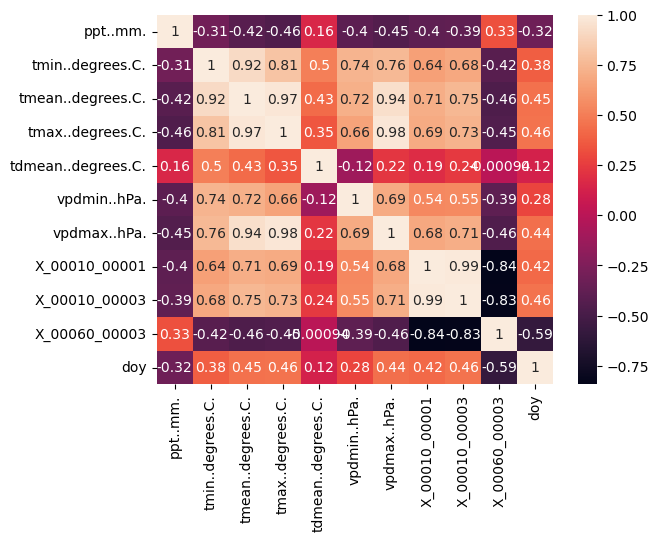

In [26]:
all_idv=[ 'ppt..mm.' 
     , 'tmin..degrees.C.'
     ,'tmean..degrees.C.'
     , 'tmax..degrees.C.', 'tdmean..degrees.C.',
      'vpdmin..hPa.', 
     'vpdmax..hPa.', 
        'X_00010_00001', # dep
  'X_00010_00003',  # dep
       'X_00060_00003' #,   'yr', 'mo',
     ,'doy' ]
corr_matrix= data[ all_idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

                   ppt..mm.  tmean..degrees.C.  vpdmax..hPa.  X_00060_00003  \
ppt..mm.           1.000000          -0.422629     -0.446359       0.330017   
tmean..degrees.C. -0.422629           1.000000      0.941886      -0.462303   
vpdmax..hPa.      -0.446359           0.941886      1.000000      -0.460030   
X_00060_00003      0.330017          -0.462303     -0.460030       1.000000   
doy               -0.319658           0.449720      0.442727      -0.588899   

                        doy  
ppt..mm.          -0.319658  
tmean..degrees.C.  0.449720  
vpdmax..hPa.       0.442727  
X_00060_00003     -0.588899  
doy                1.000000  


<Axes: >

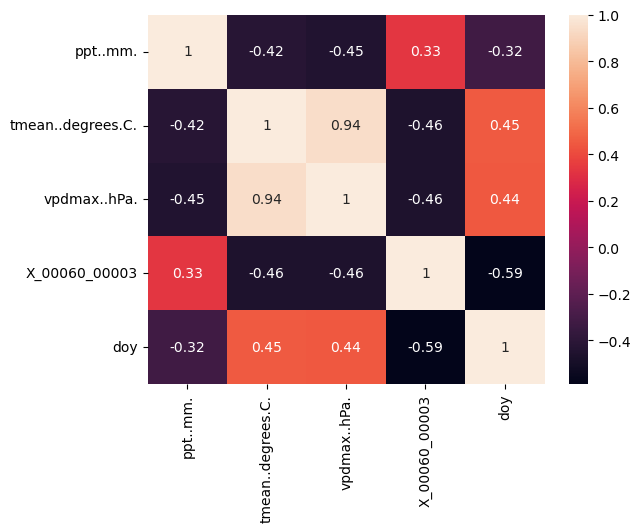

In [9]:
idv=[ 'ppt..mm.' 
     #, 'tmin..degrees.C.'
     ,'tmean..degrees.C.',
    # , 'tmax..degrees.C.', 'tdmean..degrees.C.',
     # ,'vpdmin..hPa.', 
     'vpdmax..hPa.', 
#        'X_00010_00001', # dep
 # 'X_00010_00003',  # dep
       'X_00060_00003' #,   'yr', 'mo',
     ,'doy' ]
corr_matrix= data[ idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)



In [10]:
#input=  data[  idv].to_numpy()
input=  data[  idv]

X_train, X_test, y_train, y_test = train_test_split( input,  data['X_00010_00003'], test_size=0.2, random_state=42)

print(X_train)
print(y_train)

     ppt..mm.  tmean..degrees.C.  vpdmax..hPa.  X_00060_00003  doy
65       0.00               24.0         37.06            229  220
67       0.00               24.7         39.42            234  222
31       0.00               25.7         49.16            390  186
12       2.88               14.3          9.72           1890  164
41       0.00               28.0         53.93            218  196
..        ...                ...           ...            ...  ...
106      7.73               14.3          5.73            304  169
14       0.00               16.3         23.01           1570  166
92       0.00               21.9         42.21            792  155
179      0.00               19.2         37.24            194  242
102      0.00               21.1         38.95            338  165

[144 rows x 5 columns]
65     21.7
67     22.3
31     24.6
12     12.5
41     25.5
       ... 
106    18.2
14     13.5
92     20.0
179    20.1
102    20.3
Name: X_00010_00003, Length: 144, dtype:

0.9414033468565479


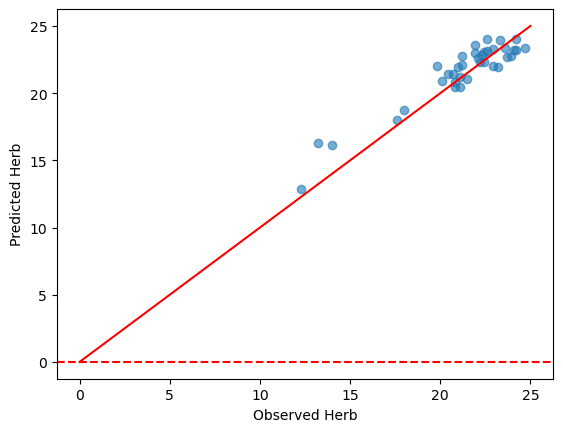

test: 0.9414383775945406
0.8705320532942343


In [11]:
linear_regr = LinearRegression()
linear_regr.fit(  X_train,  y_train )

train_fit= linear_regr.predict(X_train)

train_acc=    np.corrcoef(y_train , train_fit)[0, 1]    

print(train_acc)
yfit = linear_regr.predict(X_test)

plt.scatter( y_test , yfit , alpha=0.6)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Observed Herb")
plt.ylabel("Predicted Herb")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]

print("test:",correlation_coefficient)
print( mean_absolute_error( y_test , yfit))

In [12]:
max_depths=[1,2,3,4,5,6,7,8,9]

for max_depth in max_depths:
    print("max depth:",max_depth)
    regr = DecisionTreeRegressor( random_state=42 ,max_depth=  max_depth )
    regr.fit(  X_train,  y_train )
    train_fit=regr.predict(X_train)
    yfit = regr.predict(X_test)
    correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
    rms = mean_squared_error(y_test, yfit, squared=False)
    # Print the correlation coefficient
    print("test correlation_coefficient:", np.corrcoef(y_train , train_fit)[0, 1] )
    print("test correlation_coefficient:",correlation_coefficient)
    print("MSE:", mean_absolute_error( y_test , yfit ) )
    print("RMS:",rms)

max depth: 1
test correlation_coefficient: 0.8246041417949297
test correlation_coefficient: 0.855486513446037
MSE: 1.2578507078507084
RMS: 1.58934632885522
max depth: 2
test correlation_coefficient: 0.9015481775685057
test correlation_coefficient: 0.91491430818049
MSE: 0.9778904249484246
RMS: 1.2205938714479518
max depth: 3
test correlation_coefficient: 0.9383156994589062
test correlation_coefficient: 0.9151165744143921
MSE: 0.9052019761697178
RMS: 1.1777979116362813
max depth: 4
test correlation_coefficient: 0.953545301715753
test correlation_coefficient: 0.9224169811335147
MSE: 0.8555448419241525
RMS: 1.1267766333090863
max depth: 5
test correlation_coefficient: 0.9656635773005534
test correlation_coefficient: 0.9312681871395572
MSE: 0.798996138996139
RMS: 1.0643410668580244
max depth: 6
test correlation_coefficient: 0.9748693726053416
test correlation_coefficient: 0.9301168185401588
MSE: 0.8658335026756077
RMS: 1.082887870291414
max depth: 7
test correlation_coefficient: 0.981566674

max depth: 5
correlation_coefficient: 0.9312681871395572
MSE: 0.798996138996139
RMS: 1.0643410668580244


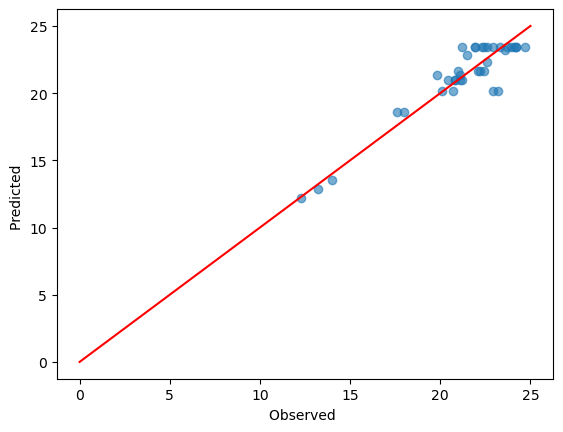

In [13]:
print("max depth:", 5)
regr = DecisionTreeRegressor( random_state=42 ,max_depth=  5)
regr.fit(  X_train,  y_train )
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

In [14]:
print(regr.feature_importances_)
print(idv)

[0.00308133 0.17231821 0.00789882 0.76071027 0.05599138]
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'X_00060_00003', 'doy']


In [15]:
params = {
    "n_estimators": 250,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [16]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.6931


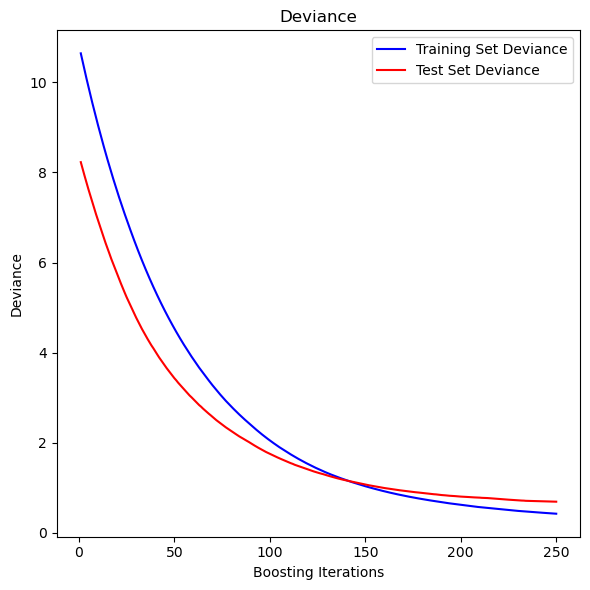

In [17]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

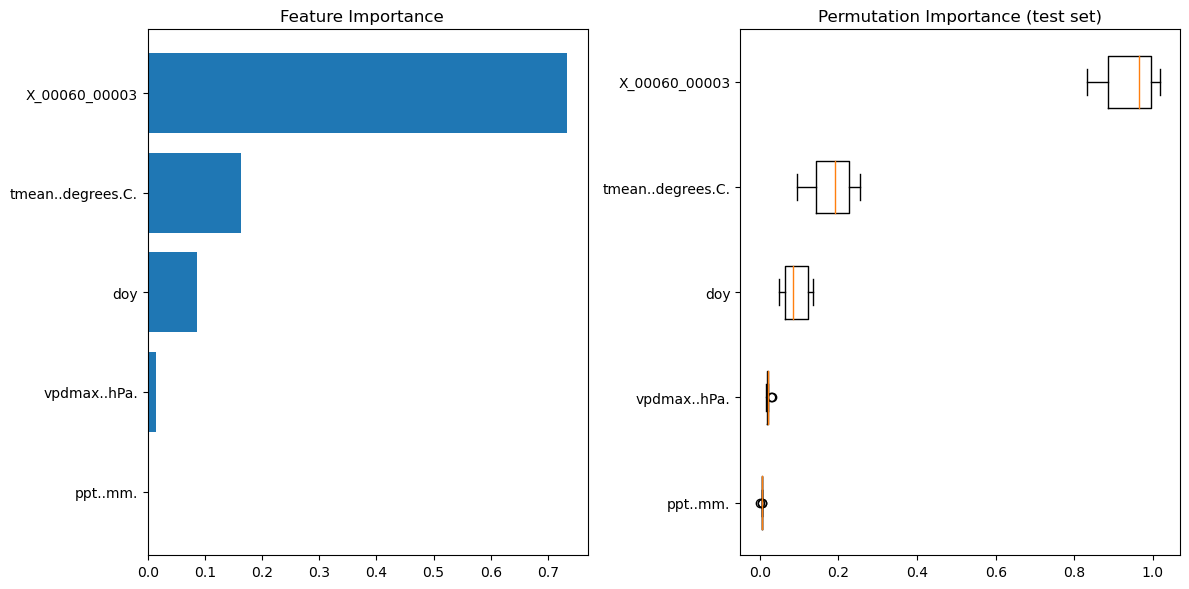

In [18]:
# Careful, impurity-based feature importances can be misleading for high cardinality features (many unique values). 
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(idv)[sorted_idx])
plt.title("Feature Importance  ")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array( idv)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [19]:
#from sklearn.datasets import load_breast_cancer
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split

#X, y = load_breast_cancer(return_X_y=True, as_frame=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train, y_train)
#print(f"Baseline accuracy on test data: {clf.score(X_test, y_test):.2}")

#X_train

In [20]:
from sklearn.inspection import permutation_importance


def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T, # importances : Raw permutation importance scores.
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

The plot on the left shows the Gini importance of the model. 

permuting a feature

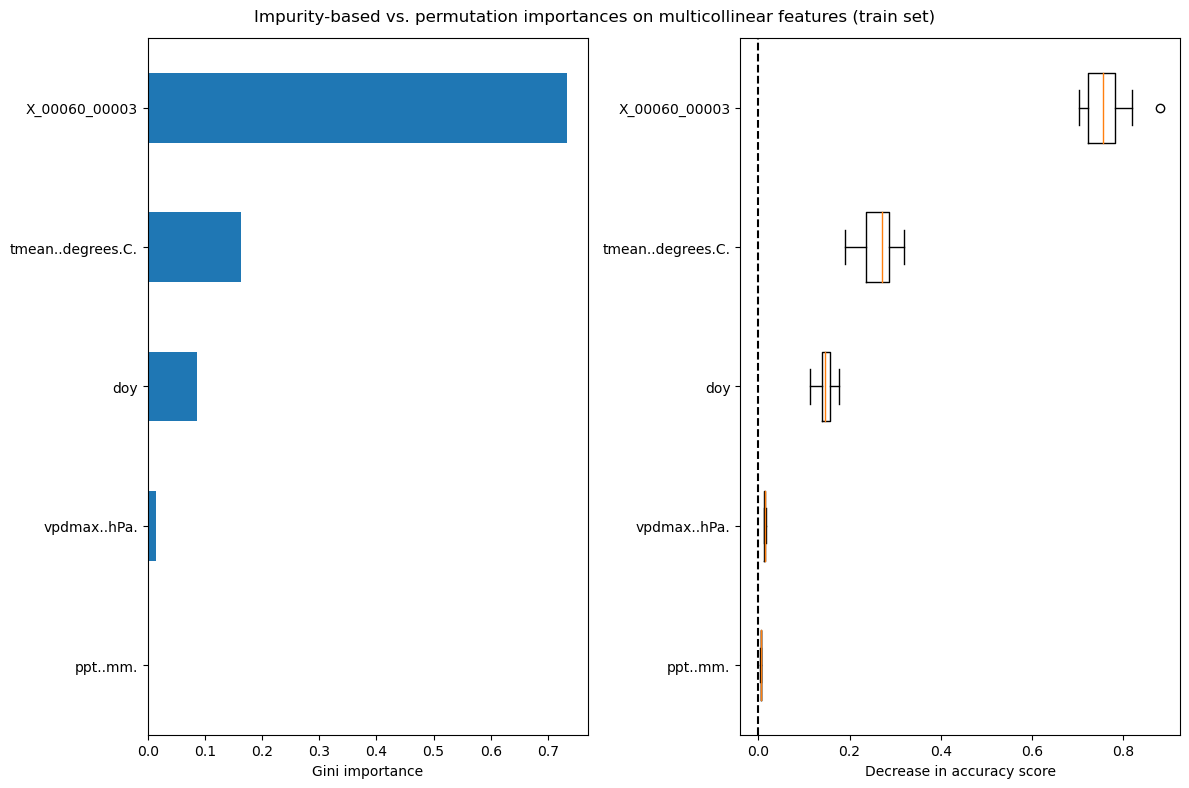

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mdi_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(reg.feature_importances_)
tree_indices = np.arange(0, len(reg.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(reg, X_train, y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

correlation_coefficient: 0.9591850406023867
MSE: 0.6643773372851582
RMS: 0.8319949263071907


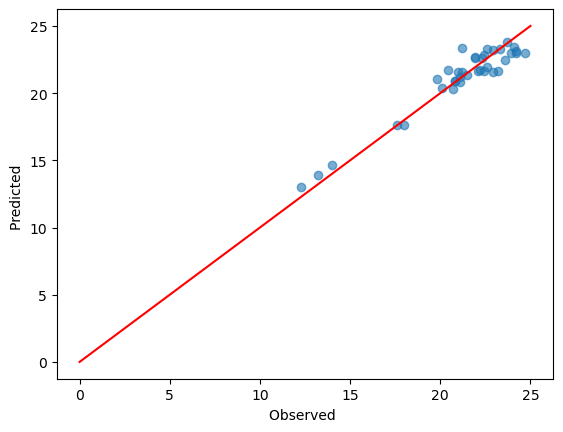

In [22]:
#regr = DecisionTreeRegressor( random_state=42 ,max_depth=  6)
#regr.fit(  X_train,  y_train )
#train_fit=regr.predict(X_train)
#yfit = regr.predict(X_test)

regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

(array([ 2.,  1.,  0.,  0.,  2.,  0.,  2.,  9., 10., 11.]),
 array([12.99372698, 14.0763003 , 15.15887362, 16.24144693, 17.32402025,
        18.40659357, 19.48916689, 20.5717402 , 21.65431352, 22.73688684,
        23.81946015]),
 <BarContainer object of 10 artists>)

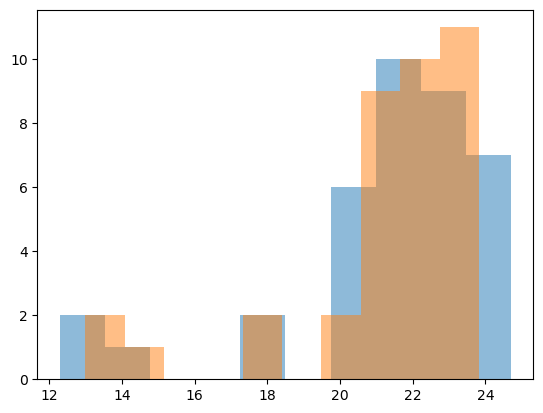

In [23]:
plt.hist(y_test , alpha=0.5)
plt.hist(yfit , alpha=0.5)